Dataset preview:


,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0



Unique labels after mapping: ['Politics' 'Sport' 'Technology' 'Entertainment' 'Business']


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


Encoding training data...

Evaluating on test data...

Classification Report:
               precision    recall  f1-score   support

     Politics       0.97      0.96      0.97       102
        Sport       0.91      0.92      0.92        77
   Technology       0.97      0.99      0.98        84
Entertainment       1.00      0.98      0.99       102
     Business       0.91      0.91      0.91        80

     accuracy                           0.96       445
    macro avg       0.95      0.95      0.95       445
 weighted avg       0.96      0.96      0.96       445


Enter a sentence to classify (or 'exit'): South Africa bounced back from an opening loss at the Women's World Cup by securing a commanding six-wicket victory over New Zealand. The Proteas' spin attack, led by Nonkululeko Mlaba, triggered a collapse that saw New Zealand post a below-par total. In the chase, South African opener Tazmin Brits anchored the innings with a brilliant century, leading her team to a morale-boos

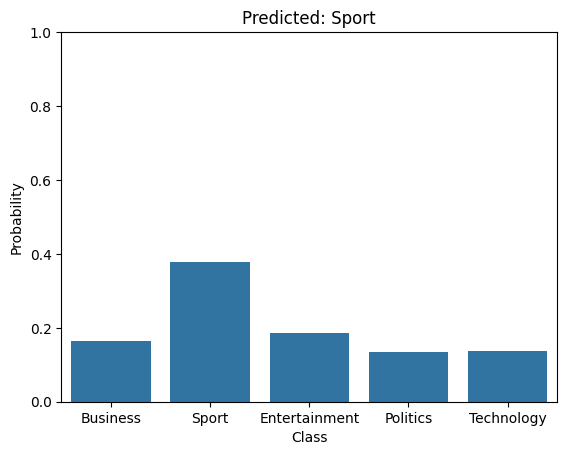


Enter a sentence to classify (or 'exit'): AI Deal Fuels US Market Records: The S&P 500 and Nasdaq indices closed at new all-time highs, driven by excitement over the AI sector. Advanced Micro Devices (AMD) stock surged after announcing a deal where OpenAI will use its chips to power AI infrastructure.

Predicted label: Business
Class probabilities:
Business: 0.356
Sport: 0.110
Entertainment: 0.148
Politics: 0.101
Technology: 0.284


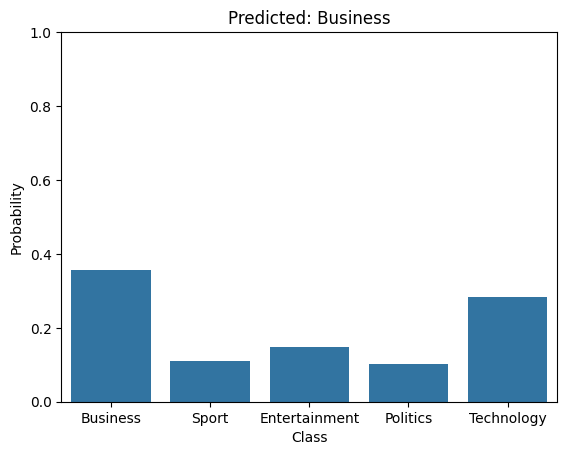


Enter a sentence to classify (or 'exit'): Two-Year Anniversary of the Gaza War: Israel is marking two years since the Hamas attack of October 7, 2023, as the war in Gaza continues, with ongoing fighting and indirect talks in Egypt between Israel and Hamas to negotiate a potential ceasefire, spurred by a US-proposed peace plan.

Predicted label: Business
Class probabilities:
Business: 0.266
Sport: 0.147
Entertainment: 0.215
Politics: 0.193
Technology: 0.178


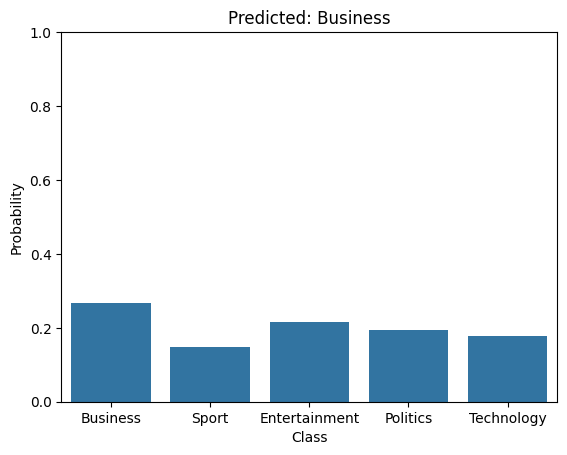


Enter a sentence to classify (or 'exit'):  Large language models (LLMs) like GPT and conversational AI agents are moving beyond basic text generation to deeply embedded roles in business automation, customer service, and creative fields. Generative AI is now a core tool for software developers, marketers, and designers, often augmenting their capabilities rather than purely replacing them.

Predicted label: Technology
Class probabilities:
Business: 0.169
Sport: 0.119
Entertainment: 0.166
Politics: 0.119
Technology: 0.427


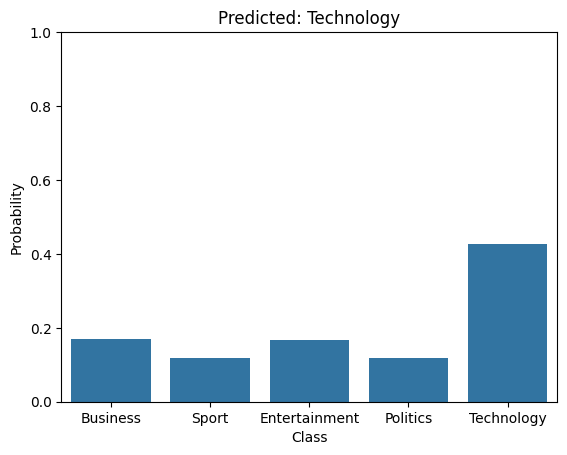


Enter a sentence to classify (or 'exit'): US-China Technology and Trade Rivalry: The competition for technological dominance, especially in areas like semiconductors, Artificial Intelligence (AI), and green energy, continues to define global trade. Export controls, tariffs, and "friendshoring" (shifting supply chains to politically allied nations) are intensifying, causing significant uncertainty for global businesses and potentially leading to higher costs and inflation for consumers.

Predicted label: Business
Class probabilities:
Business: 0.312
Sport: 0.107
Entertainment: 0.144
Politics: 0.143
Technology: 0.293


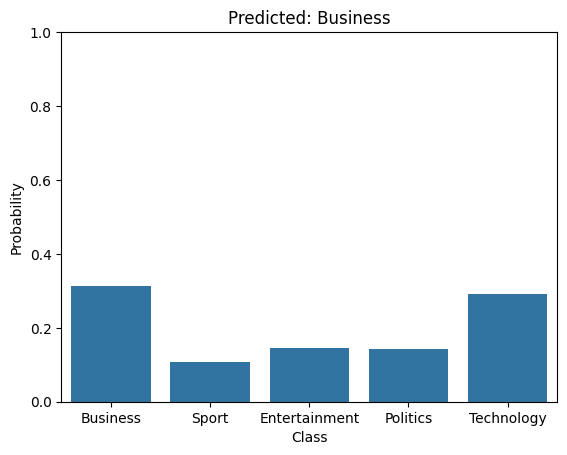


Enter a sentence to classify (or 'exit'): Despite an often-clichéd plot about a rogue detective chasing a dark government conspiracy, Shadow Protocol elevates itself through sheer cinematic craft. Director Ava Chen’s dedication to practical effects and gritty, hand-held camerawork makes the numerous action sequences feel brutally real and immediate, standing in stark contrast to the genre’s usual reliance on glossy CGI. Furthermore, lead actor Elias Vance delivers a career-best performance, conveying the detective’s weary desperation with minimal dialogue and an intensely expressive physicality. While the film struggles to maintain pacing in its slower middle act, the breathtaking final fifteen minutes—a silent, rain-drenched rooftop confrontation—cement it as a thrilling and technically brilliant piece of genre filmmaking that is worth the ticket price.

Predicted label: Entertainment
Class probabilities:
Business: 0.177
Sport: 0.173
Entertainment: 0.314
Politics: 0.122
Technology: 0

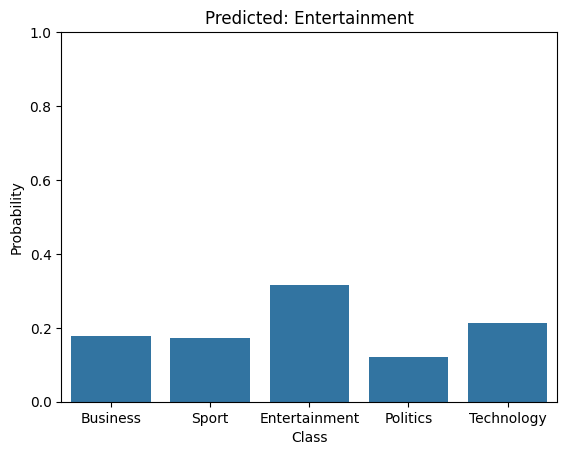


Enter a sentence to classify (or 'exit'): exit


In [1]:

from transformers import AutoTokenizer, BertModel
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#dataset loading

df = pd.read_csv("/content/df_file.csv")  # replace with your path
print("Dataset preview:")
display(df.head())

# label mapping from dataset

label_mapping = {
    0: "Politics",
    1: "Sport",
    2: "Technology",
    3: "Entertainment",
    4: "Business"
}

if np.issubdtype(df["Label"].dtype, np.number):
    df["Label"] = df["Label"].map(label_mapping)

print("\nUnique labels after mapping:", df["Label"].unique())

#BERT model and tokeniser

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased") # Use BertModel directly
model.eval()

#embedding

def get_embedding(sentence):

    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embedding

#centroid

def calculate_centroid(embeddings):

    return np.mean(embeddings, axis=0)

# train test split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Label"])

# computing embeddings

print("\nEncoding training data...")
train_embeddings = [get_embedding(text) for text in train_df["Text"]]
train_labels = train_df["Label"].tolist()

#computing centriods

centroids = {}
for label in train_df["Label"].unique():
    indices = [i for i, l in enumerate(train_labels) if l == label]
    centroids[label] = calculate_centroid([train_embeddings[i] for i in indices])

#classfication

def classify_sentence(sentence):
    emb = get_embedding(sentence)
    distances = {label: np.linalg.norm(emb - centroid) for label, centroid in centroids.items()}
    similarities = {label: -dist for label, dist in distances.items()}  # smaller distance → higher similarity
    exp_scores = np.exp(list(similarities.values()))
    probs = exp_scores / exp_scores.sum()
    prob_dict = {label: prob for label, prob in zip(similarities.keys(), probs)}
    best_label = max(prob_dict, key=prob_dict.get)
    return best_label, prob_dict

#plotting probabilities

def plot_probabilities(prob_dict, title="Class Probabilities"):
    labels = list(prob_dict.keys())
    probs = [prob_dict[label] for label in labels]
    sns.barplot(x=labels, y=probs)
    plt.ylim(0, 1)
    plt.title(title)
    plt.ylabel("Probability")
    plt.xlabel("Class")
    plt.show()

#evaluation

print("\nEvaluating on test data...")
test_predictions = []
for text in test_df["Text"]:
    pred, _ = classify_sentence(text)
    test_predictions.append(pred)

print("\nClassification Report:")
print(classification_report(test_df["Label"], test_predictions, target_names=list(label_mapping.values())))

#input from user

while True:
    user_input = input("\nEnter a sentence to classify (or 'exit'): ")
    if user_input.lower() == "exit":
        break
    label, prob_dict = classify_sentence(user_input)
    print(f"\nPredicted label: {label}")
    print("Class probabilities:")
    for k, v in prob_dict.items():
        print(f"{k}: {v:.3f}")
    plot_probabilities(prob_dict, title=f"Predicted: {label}")